## Observations and Insights 

In [1]:
# Dependencies and Setup

import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import sem


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
complete_mice_df = pd.merge(mouse_metadata,study_results, on="Mouse ID")

# Display the data table for preview
complete_mice_df.head(15)
duplicate = complete_mice_df[complete_mice_df.duplicated(keep = "last")]
duplicate

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.0,0


In [2]:
# Checking the number of mice.
micecount_df = complete_mice_df.loc[complete_mice_df["Mouse ID"] == "g989",:]
micecount_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [3]:
cleaned_mice_df = complete_mice_df[complete_mice_df["Mouse ID"] != 'g989']
cleaned_mice_df["Mouse ID"].value_counts()
# cleaned_mice_df.head()

i177    10
v991    10
t565    10
a203    10
j296    10
        ..
u153     1
x226     1
o848     1
t573     1
x336     1
Name: Mouse ID, Length: 248, dtype: int64

In [4]:
# Checking the number of mice in the clean DataFrame.
cleaned_mice_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


## Summary Statistics

In [5]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.()
regimendrugs_df = cleaned_mice_df.groupby("Drug Regimen")["Mouse ID"].nunique()
regimendrugs_df
drug_count_df = pd.DataFrame(regimendrugs_df)
drug_count_df = drug_count_df.reset_index()
drug_count_df


,Drug Regimen,Mouse ID
0,Capomulin,25
1,Ceftamin,25
2,Infubinol,25
3,Ketapril,25
4,Naftisol,25
5,Placebo,25
6,Propriva,24
7,Ramicane,25
8,Stelasyn,24
9,Zoniferol,25


In [6]:
regimen_df = cleaned_mice_df.groupby("Drug Regimen")
regimen_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


In [7]:
mice_mean= regimen_df["Tumor Volume (mm3)"].mean()
mice_median = regimen_df["Tumor Volume (mm3)"].median()
mice_variance = regimen_df["Tumor Volume (mm3)"].var()
mice_sd = regimen_df["Tumor Volume (mm3)"].std()
# mice_sem = sem(regimen_df["Tumor Volume (mm3)"])
print (mice_mean)


Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.320930
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64


In [8]:
a_merge = pd.merge(mice_mean,mice_median, on ="Drug Regimen", suffixes=("_Mean","_Median"))
a_merge

,Tumor Volume (mm3)_Mean,Tumor Volume (mm3)_Median
Drug Regimen,,
Capomulin,40.675741,41.557809
Ceftamin,52.591172,51.776157
Infubinol,52.884795,51.820584
Ketapril,55.235638,53.698743
Naftisol,54.331565,52.509285
Placebo,54.033581,52.288934
Propriva,52.320930,50.446266
Ramicane,40.216745,40.673236
Stelasyn,54.233149,52.431737


In [9]:
b_merge = pd.merge(mice_variance,mice_sd, on ="Drug Regimen", suffixes=("_Variance","_Standard Dev"))
b_merge

,Tumor Volume (mm3)_Variance,Tumor Volume (mm3)_Standard Dev
Drug Regimen,,
Capomulin,24.947764,4.994774
Ceftamin,39.290177,6.268188
Infubinol,43.128684,6.567243
Ketapril,68.553577,8.279709
Naftisol,66.173479,8.134708
Placebo,61.168083,7.821003
Propriva,43.852013,6.622085
Ramicane,23.486704,4.846308
Stelasyn,59.450562,7.710419


In [10]:
Combined_regimen_df = pd.merge(a_merge,b_merge, on= "Drug Regimen")
Combined_regimen_df

,Tumor Volume (mm3)_Mean,Tumor Volume (mm3)_Median,Tumor Volume (mm3)_Variance,Tumor Volume (mm3)_Standard Dev
Drug Regimen,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774
Ceftamin,52.591172,51.776157,39.290177,6.268188
Infubinol,52.884795,51.820584,43.128684,6.567243
Ketapril,55.235638,53.698743,68.553577,8.279709
Naftisol,54.331565,52.509285,66.173479,8.134708
Placebo,54.033581,52.288934,61.168083,7.821003
Propriva,52.320930,50.446266,43.852013,6.622085
Ramicane,40.216745,40.673236,23.486704,4.846308
Stelasyn,54.233149,52.431737,59.450562,7.710419


In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
regimen_df["Tumor Volume (mm3)"].agg(["mean", "median","std", "var"])

,mean,median,std,var
Drug Regimen,,,,
Capomulin,40.675741,41.557809,4.994774,24.947764
Ceftamin,52.591172,51.776157,6.268188,39.290177
Infubinol,52.884795,51.820584,6.567243,43.128684
Ketapril,55.235638,53.698743,8.279709,68.553577
Naftisol,54.331565,52.509285,8.134708,66.173479
Placebo,54.033581,52.288934,7.821003,61.168083
Propriva,52.320930,50.446266,6.622085,43.852013
Ramicane,40.216745,40.673236,4.846308,23.486704
Stelasyn,54.233149,52.431737,7.710419,59.450562


## Bar and Pie Charts

In [33]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
mice_count = regimen_df["Mouse ID"].nunique()
regimencounts_df = regimen_df["Drug Regimen"].nunique()
# Print(mice_count)
regimencounts_df

Drug Regimen
Capomulin    1
Ceftamin     1
Infubinol    1
Ketapril     1
Naftisol     1
Placebo      1
Propriva     1
Ramicane     1
Stelasyn     1
Zoniferol    1
Name: Drug Regimen, dtype: int64

Text(0.5, 0, 'Drug Regimen')

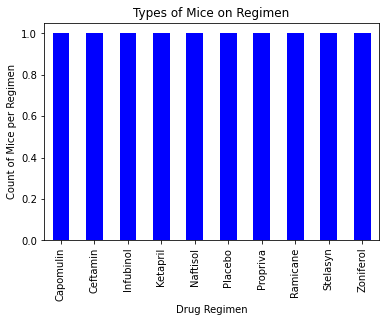

In [34]:
regimencounts_df.plot(kind = "bar", color = "blue")
plt.title("Types of Mice on Regimen")
plt.ylabel("Count of Mice per Regimen")
plt.xlabel("Drug Regimen")

In [35]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
x_axis = np.arange(len(mice_count))
tick_locations = x_axis
x_axis


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

Text(0.5, 0, 'Drug Regimen')

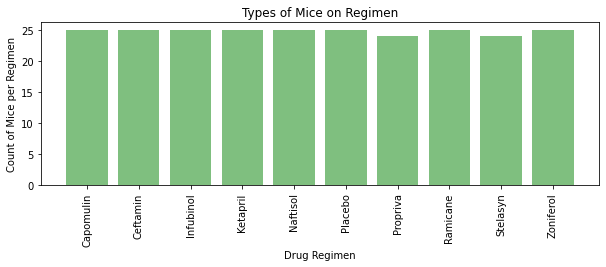

In [15]:
plt.figure(figsize=(10,3))
plt.bar(x_axis, mice_count, color='g', alpha=0.5, align="center")
plt.xticks(tick_locations, drug_count_df["Drug Regimen"], rotation="vertical")
plt.title("Types of Mice on Regimen")
plt.ylabel("Count of Mice per Regimen")
plt.xlabel("Drug Regimen")

Text(0.5, 1.0, '% of Male/Female distribution')

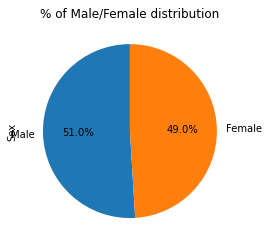

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

gender_df = cleaned_mice_df["Sex"].value_counts()
gender_df.plot(kind ="pie", startangle = 90,autopct='%1.1f%%')
plt.title("% of Male/Female distribution")

([<matplotlib.patches.Wedge at 0x7fd7e792f850>,
 [Text(-1.0995024239828841, -0.03308201408261565, 'Male'),
  Text(1.0995024239828841, 0.033082014082615026, 'Female')],
 [Text(-0.5997285948997549, -0.018044734954153988, '51.0%'),
  Text(0.5997285948997549, 0.018044734954153648, '49.0%')])

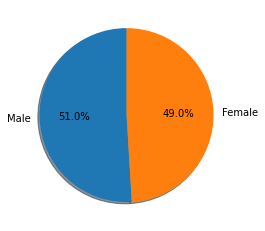

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_df
labels = ["Male","Female"]

plt.pie(gender_df, labels = labels, autopct="%1.1f%%", shadow=True, startangle=90)


## Quartiles, Outliers and Boxplots

In [36]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
# scoped_regimen_df = cleaned_mice_df.loc["Mouse ID"]
mice_group_df = cleaned_mice_df[["Drug Regimen","Mouse ID","Timepoint"]]
mice_group_df = mice_group_df.set_index("Drug Regimen")
mice_group_df
limited_mice_group_df = mice_group_df.loc[["Capomulin", "Ramicane", "Infubinol","Ceftamin"],["Mouse ID", "Timepoint"]]
limited_mice_group_df
mice_max_df = limited_mice_group_df.groupby(["Drug Regimen","Mouse ID"])
# print(mice_max_df)
mice_max_df = mice_max_df.max()
mice_max_df
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
mice_merged_df = mice_max_df.merge(cleaned_mice_df,how="left", left_on=["Mouse ID","Timepoint"],right_on=["Mouse ID","Timepoint"])
mice_merged_df = mice_merged_df.set_index("Drug Regimen")
mice_merged_df

,Mouse ID,Timepoint,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,,,
Capomulin,b128,45,Female,9,22,38.982878,2
Capomulin,b742,45,Male,7,21,38.939633,0
Capomulin,f966,20,Male,16,17,30.485985,0
Capomulin,g288,45,Male,3,19,37.074024,1
Capomulin,g316,45,Female,22,22,40.159220,2
...,...,...,...,...,...,...,...
Ramicane,s508,45,Male,1,17,30.276232,0
Ramicane,u196,45,Male,18,25,40.667713,3
Ramicane,w678,5,Female,5,24,43.166373,0


In [19]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = mice_merged_df["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of occupancy is: {lowerq}")
print(f"The upper quartile of occupancy is: {upperq}")
print(f"The interquartile range of occupancy is: {iqr}")
    
# Determine outliers using upper and lower bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of occupancy is: 37.187743802499995
The upper quartile of occupancy is: 59.930261755000004
The interquartile range of occupancy is: 22.74251795250001
Values below 3.0739668737499812 could be outliers.
Values above 94.04403868375002 could be outliers.


In [20]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    

    

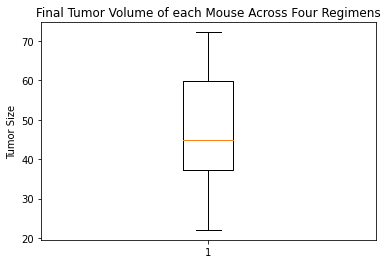

In [64]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
four_regimens_df = mice_merged_df.groupby(["Drug Regimen","Mouse ID"])["Tumor Volume (mm3)"].max()
# four_regimens_df= pd.DataFrame(four_regimens_df)
four_regimens_df


fig1, ax1 = plt.subplots()
ax1.set_title("Final Tumor Volume of each Mouse Across Four Regimens")
ax1.set_ylabel("Tumor Size")
ax1.boxplot(four_regimens_df)
plt.show()

## Line and Scatter Plots

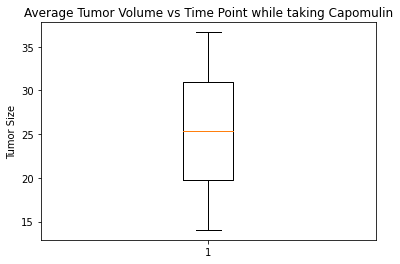

In [61]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capumulin_time_df = mice_merged_df.loc[["Capomulin"],["Tumor Volume (mm3)","Age_months"]].mean()
capumulin_time_df


fig1, ax1 = plt.subplots()
ax1.set_title("Average Tumor Volume vs Time Point while taking Capomulin")
ax1.set_ylabel('Tumor Size')
ax1.boxplot(capumulin_time_df)
plt.show()

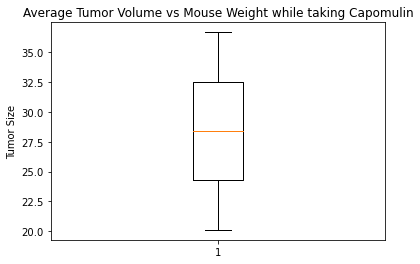

In [60]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capumulin_weight_df = mice_merged_df.loc[["Capomulin"],["Tumor Volume (mm3)","Weight (g)"]].mean()
capumulin_weight_df

fig1, ax1 = plt.subplots()
ax1.set_title("Average Tumor Volume vs Mouse Weight while taking Capomulin")
ax1.set_ylabel('Tumor Size')
ax1.boxplot(capumulin_weight_df)
plt.show()

## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
